# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [10]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [4]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [34]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Alice', 'Bob', 'Chuck']

Here's how we add edges between nodes.

In [35]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

And here's how to draw the graph.

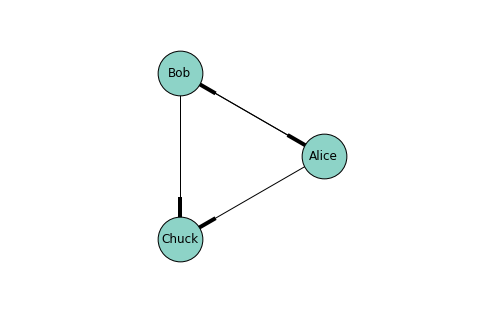

In [36]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

True

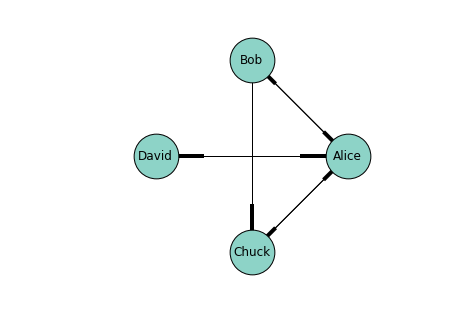

In [47]:
# Solution goes here
G.add_node('David')
G.add_edge('Alice','David')
G.add_edge('David','Alice')
G.add_edge('Chuck','Alice')

nx.draw_circular(G,
                node_color=COLORS[0],
                node_size=2000,
                with_labels=True)
plt.axis('equal')
plt.savefig('ex.pdf')
G.neighbors('David')
is_directed_connected(G)

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [12]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']


(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [30]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['Boston', 'Baltimore', 'NYC', 'Albany', 'Philly']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [14]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [15]:
G.add_edges_from(drive_times)
G.edges()

[('Boston', 'Albany'), ('Boston', 'NYC'), ('Albany', 'NYC'), ('NYC', 'Philly')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

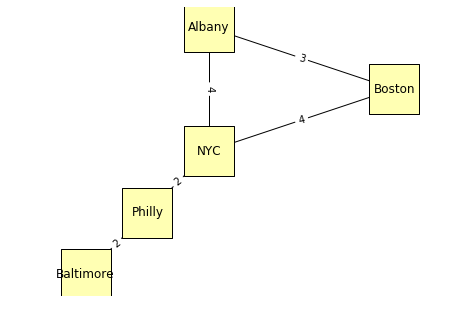

In [18]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

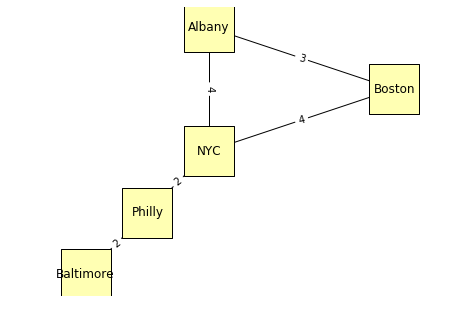

In [22]:
# Solution goes here
pos['Baltimore']=(-76,39)
drive_times[('Philly','Baltimore')]=2
G.add_node('Baltimore')
G.add_edge('Philly','Baltimore')

nx.draw(G, pos,
       node_color=COLORS[1],
       node_shape='s',
       node_size=2500,
       with_labels=True)

nx.draw_networkx_edge_labels(G, pos,
                            edge_labels=drive_times)

plt.axis('equal')
plt.savefig('ex2.pdf')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [7]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [8]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [11]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

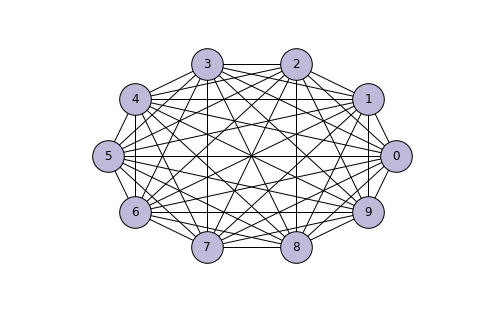

In [26]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [17]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

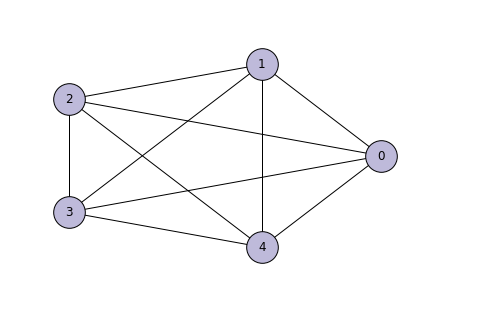

In [28]:
# Solution goes here
complete2 = make_complete_graph(5)
nx.draw_circular(complete2,
                node_color=COLORS[2],
                node_size=1000,
                with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [19]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [20]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [21]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [22]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

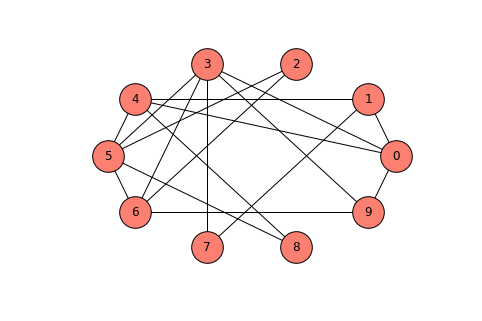

In [23]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [5]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [25]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [26]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [39]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [28]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [29]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [30]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [44]:
# Solution goes here
# For a directed graph to be a path, all nodes in a graph should be reachable from any given point. 
# Since the neighbors method already takes account the directionality of an edge, we can reuse the reachable_nodes
# function. However, we have to loop through every node as a starting point.
def is_directed_connected(G):
    flag = True
    for node in G.nodes_iter():
        reachable = reachable_nodes(G, node)
        flag = len(reachable) == len(G)
        if not flag:
            return False
    return flag

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [32]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [33]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [34]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [35]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [36]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.11
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

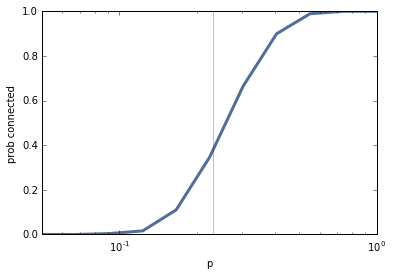

In [37]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

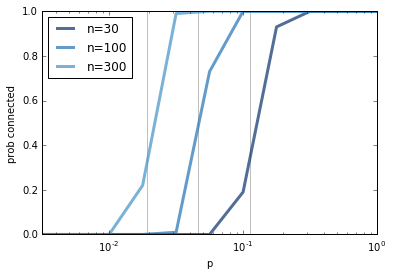

In [38]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)        return len(reachable) == len(G)

**solution**
____________
*Getting first element from the nodes iterator is a constant time.
Running the reachable_nodes function is O(n+m)
Checking the length of reachcable to the length of G is O(1).
The order of growth for is_connected is still O(n+m)?*

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [13]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            for elem in G.neighbors(node):
                if elem not in seen:
                    stack.append(elem)
    return seen

**solution**
____________
- It seems like this modificiation does not make the function faster. Both versions of the function have the similar runtimes for a range of input size.
- Empirical data strongly suggests that the order of growth for both functions is same but I am not entirely sure why.

In [19]:
complete = make_complete_graph(10)
complete2 = make_complete_graph(100)
complete3 = make_complete_graph(1000)
%timeit len(reachable_nodes(complete, 0))
%timeit len(reachable_nodes(complete2, 0))
%timeit len(reachable_nodes(complete3, 0))

100000 loops, best of 3: 19.3 µs per loop
1000 loops, best of 3: 1.3 ms per loop
10 loops, best of 3: 142 ms per loop


In [20]:
%timeit len(reachable_nodes_precheck(complete, 0))
%timeit len(reachable_nodes_precheck(complete2, 0))
%timeit len(reachable_nodes_precheck(complete3, 0))

10000 loops, best of 3: 20.1 µs per loop
1000 loops, best of 3: 1.31 ms per loop
10 loops, best of 3: 144 ms per loop


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

10 Nodes
(5, 0.0)
(6, 0.0)
(7, 0.0)
(8, 0.0)
(9, 0.11)
(10, 0.19)
(11, 0.44)
(12, 0.54)
(13, 0.64)
(14, 0.79)
15 Nodes
(12, 0.0)
(13, 0.0)
(14, 0.01)
(15, 0.06)
(16, 0.14)
(17, 0.17)
(18, 0.32)
(19, 0.39)
(20, 0.45)
(21, 0.52)


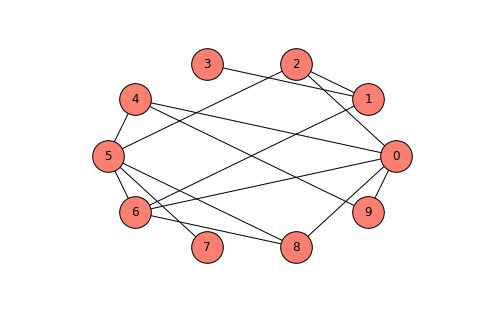

In [63]:
import random

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

def prob_connected_m_graph(n, m, iters=100):
    count = 0
    for i in range(iters):
        random_graph = m_graph(n, m)
        if is_connected(random_graph):
            count += 1
    return count/iters

def m_pairs(nodes,m):
    possible_pairs = []
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                possible_pairs.append((u,v))
    return random.sample(possible_pairs,m)

def m_graph(n,m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes,m))
    return G

m_graph_ex = m_graph(10,15)

nx.draw_circular(m_graph_ex, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)

m_values = range(5,15)
m_values2 = range(12,22)
print('10 Nodes')
for value in m_values:
    print((value,prob_connected_m_graph(10,value)))
print('15 Nodes')
for value in m_values2:
    print((value,prob_connected_m_graph(15,value)))

Like first type of ER graph, it seems like there exists a critical value for different value of n. For n=10, critical value seems to be 10 (big jump from 10:0.19 to 11:0.44). For n=15, the critical value seems to be around 17.

# What I think of Complexity Science
The most interesting part of the complexity science to me is its approach to a solution that one's trying to get. The nature of complexity science that puts a lot of emphasis on computational modelling, simulation, etc rather than analytical, 'XYZ-law' kind of solution that the traditional science focuses on is very interesting to me. Another aspect of compleixity science that interests me is its huge potential that is linked to the advancement of computing technology. I am not sure whether fields like data science, machine learning, artifical intelligence fall under the category of complexity science, but assuming that those are the part of complexity science domain, I am very excited to explore complexity science because aforementioned areas are the topics that I am very interested in. 